In [4]:
import pickle
import numpy as np
import tensorflow_addons as tfa
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential, Model
import matplotlib.pyplot as plt

In [5]:
with open('X.pkl', 'rb') as f:
    X = pickle.load(f)
with open('y.pkl', 'rb') as f:
    y = pickle.load(f)  

In [6]:
X = X.reshape(-1, 1 ,64)

In [7]:
print(X.shape, y.shape)

(1847, 1, 64) (1847,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [9]:
input_ = layers.Input((1,64))
x = layers.LSTM(256)(input_)
x = tfa.layers.GELU()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256)(x)
x = tfa.layers.GELU()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128)(x)
x = tfa.layers.GELU()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64)(x)
x = tfa.layers.GELU()(x)
output = layers.Dense(1)(x)

In [10]:
opt = tf.keras.optimizers.Adam(1e-4)
model = Model(input_, output)

In [11]:
model.compile(optimizer=opt, loss='mse')
history = model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
93/93 [==============================] - 2s 5ms/step - loss: 10.8127 - val_loss: 10.8329
Epoch 2/100
93/93 [==============================] - 0s 3ms/step - loss: 10.6539 - val_loss: 10.4942
Epoch 3/100
93/93 [==============================] - 0s 2ms/step - loss: 9.1074 - val_loss: 5.6953
Epoch 4/100
93/93 [==============================] - 0s 2ms/step - loss: 2.4799 - val_loss: 0.6404
Epoch 5/100
93/93 [==============================] - 0s 2ms/step - loss: 1.1581 - val_loss: 0.5635
Epoch 6/100
93/93 [==============================] - 0s 2ms/step - loss: 0.8353 - val_loss: 0.4010
Epoch 7/100
93/93 [==============================] - 0s 2ms/step - loss: 0.7197 - val_loss: 0.4499
Epoch 8/100
93/93 [==============================] - 0s 2ms/step - loss: 0.6275 - val_loss: 0.3582
Epoch 9/100
93/93 [==============================] - 0s 3ms/step - loss: 0.6580 - val_loss: 0.4062
Epoch 10/100
93/93 [==============================] - 0s 2ms/step - loss: 0.5339 - val_loss: 0.3742
Epoch

Epoch 83/100
93/93 [==============================] - 0s 3ms/step - loss: 0.3941 - val_loss: 0.3487
Epoch 84/100
93/93 [==============================] - 0s 2ms/step - loss: 0.4122 - val_loss: 0.3491
Epoch 85/100
93/93 [==============================] - 0s 2ms/step - loss: 0.4079 - val_loss: 0.3923
Epoch 86/100
93/93 [==============================] - 0s 2ms/step - loss: 0.4059 - val_loss: 0.4368
Epoch 87/100
93/93 [==============================] - 0s 3ms/step - loss: 0.3885 - val_loss: 0.3453
Epoch 88/100
93/93 [==============================] - 0s 2ms/step - loss: 0.3748 - val_loss: 0.3525
Epoch 89/100
93/93 [==============================] - 0s 3ms/step - loss: 0.3951 - val_loss: 0.3501
Epoch 90/100
93/93 [==============================] - 0s 2ms/step - loss: 0.3953 - val_loss: 0.4103
Epoch 91/100
93/93 [==============================] - 0s 3ms/step - loss: 0.4412 - val_loss: 0.5286
Epoch 92/100
93/93 [==============================] - 0s 2ms/step - loss: 0.3899 - val_loss: 0.3443


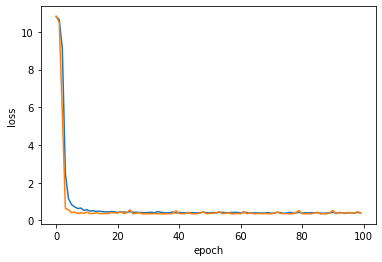

In [12]:
plt.plot(np.array([history.history['loss'], history.history['val_loss']]).T)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [13]:
model.save('reg.h5')